In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np
import datetime

from plotnine import *
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

from src.preprocessing import *

np.random.seed(8)
random.seed(8)

%matplotlib inline

Using TensorFlow backend.


### Defining parameters

In [2]:
folder = 'EC_number/archaea/3denses/bio_neurons/'
column = "EC number"
max_lenn = 1000
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'strf_padding', 'ext_padding', 
                 'rnd_padding',
                'zoom_padding'
                ]

# Loading and processing data

In [3]:
file_in= "".join([absPath, 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df = loading_data(file_in, column)

df.info()

/home/angela/padding_EBI/src/preprocessing.py:39: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pd.read_table(file_in,compression='gzip',sep='\t')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19554 entries, 0 to 19553
Data columns (total 3 columns):
Entry        19554 non-null object
Sequence     19554 non-null object
EC number    19554 non-null object
dtypes: object(3)
memory usage: 458.4+ KB


In [4]:
# creating binary enzyme/no enzyme label
#df_bin = binarizing_EC(df)

#processing enzyme class label
df_digit1 = first_digit_EC(df)

In [5]:
df_digit1.head()

,Entry,Sequence,EC number,digit1
0,F9VN79,MIIGYFDGLCEPKNPGGIATFGFVIYLDNRKIEGYGLAEKPFSINS...,3.1.26.4,[3]
1,Q60365,MIIEGEVVSGLGEGRYFLSLPPYKEIFKKILGFEPYEGTLNLKLDR...,2.7.1.161,[2]
2,P50384,MNINEILKKLINKSDLEINEAEELAKAIIRGEVPEILVSAILVALR...,2.4.2.18,[2]
3,O59245,MVVPLKRIDKIRWEIPKFDKRMRVPGRVYADEVLLEKMKNDRTLEQ...,6.5.1.-; 3.1.-.-,"[6, 3]"
4,Q8U4G1,MERAFIEWYPRGYGVAFKIKKKIYEKLSKYQKIEVYETEGFGRLLA...,2.5.1.23; 2.5.1.-; 2.5.1.104; 2.5.1.16,[2]


In [6]:
#Separating proteins with many EC numbers in different rows
df_separated = df_digit1.digit1.apply(pd.Series) \
    .merge(df_digit1, right_index = True, left_index = True) \
    .drop(["digit1"], axis = 1) \
    .melt(id_vars = ['Entry', 'Sequence', 'EC number'], value_name = "digit1") \
    .drop("variable", axis = 1) \
    .dropna()

In [7]:
df_separated.head()

,Entry,Sequence,EC number,digit1
0,F9VN79,MIIGYFDGLCEPKNPGGIATFGFVIYLDNRKIEGYGLAEKPFSINS...,3.1.26.4,3
1,Q60365,MIIEGEVVSGLGEGRYFLSLPPYKEIFKKILGFEPYEGTLNLKLDR...,2.7.1.161,2
2,P50384,MNINEILKKLINKSDLEINEAEELAKAIIRGEVPEILVSAILVALR...,2.4.2.18,2
3,O59245,MVVPLKRIDKIRWEIPKFDKRMRVPGRVYADEVLLEKMKNDRTLEQ...,6.5.1.-; 3.1.-.-,6
4,Q8U4G1,MERAFIEWYPRGYGVAFKIKKKIYEKLSKYQKIEVYETEGFGRLLA...,2.5.1.23; 2.5.1.-; 2.5.1.104; 2.5.1.16,2


# Plotting

In [8]:
df_separated['seq_length'] =  df_separated['Sequence'].str.len()

### Keeping sequences>threshold

/home/angela/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/angela/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed i

/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  re

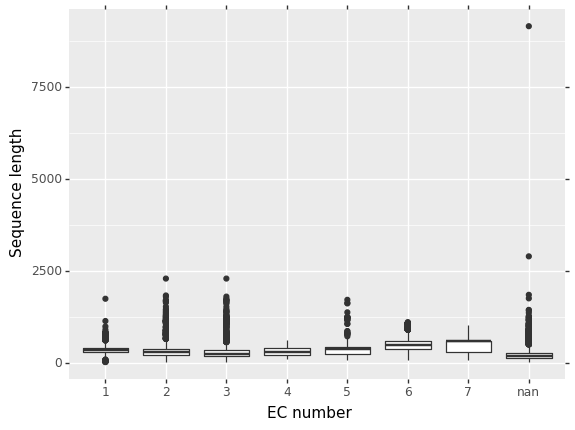

<ggplot: (8791248496185)>

In [9]:
(ggplot(df_separated, aes(x="factor(digit1)", y="seq_length")) 
 + geom_boxplot()
+labs(x="EC number", y="Sequence length"))

In [10]:
# binarizing enzyme/non-enzyme
df_bin = binarizing_EC(df_separated)

1.0    11067
0.0     8758
Name: enzyme, dtype: int64


In [11]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19825 entries, 0 to 40142
Data columns (total 6 columns):
Entry         19825 non-null object
Sequence      19825 non-null object
EC number     19825 non-null object
digit1        19825 non-null object
seq_length    19825 non-null int64
enzyme        19825 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [12]:
#do they come from the same distribution?
stats.mannwhitneyu(df_separated.loc[df_separated.enzyme == 0.0,'seq_length'],
        df_separated.loc[df_separated.enzyme == 1.0,'seq_length'])

MannwhitneyuResult(statistic=24612425.5, pvalue=0.0)

### Removing sequences<threshold

In [13]:
df_filt = filtering_over_maxlen(df_bin, max_lenn)

In [14]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 6 columns):
Entry         19600 non-null object
Sequence      19600 non-null object
EC number     19600 non-null object
digit1        19600 non-null object
seq_length    19600 non-null int64
enzyme        19600 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 918.8+ KB


In [15]:
Counter(df_filt["enzyme"]) 

Counter({0.0: 8727, 1.0: 10873})

/home/angela/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/angela/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed i

/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  re

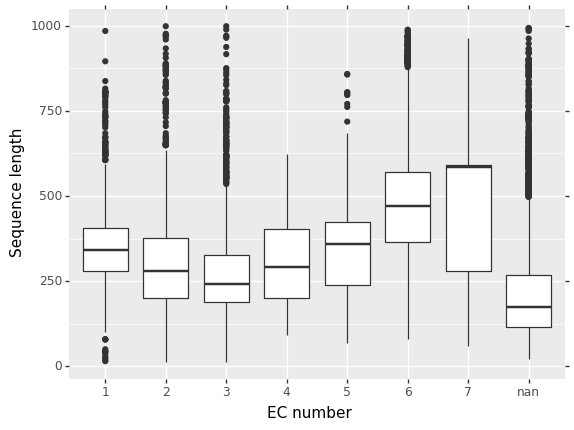

<ggplot: (8728130421824)>

In [14]:
(ggplot(df_filt, aes(x="factor(digit1)", y="seq_length")) 
 + geom_boxplot()
+labs(x="EC number", y="Sequence length"))

In [11]:
list_digits = [df_filt.loc[df_filt.digit1 == i,'seq_length'] 
               for i in ["1", "2", "3", "4", "5", "6", "7"]]

In [16]:
# hay diferencias?
stats.kruskal(list_digits[0], list_digits[1], list_digits[2], list_digits[3], list_digits[4], list_digits[5],
             list_digits[6])

KruskalResult(statistic=2187.242662210444, pvalue=0.0)

## Only enzyme vs no enzyme

/home/angela/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/angela/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/angela/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed i

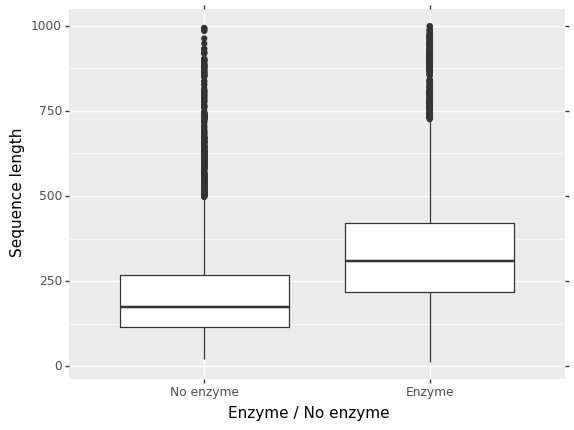

<ggplot: (-9223363308718975207)>

In [17]:
(ggplot(df_filt, aes(x="factor(enzyme)", y="seq_length")) 
 + geom_boxplot()
+labs(x="Enzyme / No enzyme", y="Sequence length")
+scale_x_discrete(labels=["No enzyme", "Enzyme"]))

In [18]:
#do they come from the same distribution?
stats.mannwhitneyu(df_filt.loc[df_filt.enzyme == 0.0,'seq_length'],
        df_filt.loc[df_filt.enzyme == 1.0,'seq_length'])

MannwhitneyuResult(statistic=24272217.0, pvalue=0.0)

In [12]:
# getting sequences for PCA
df_long_filt = filtering_over_maxlen(df, max_lenn)
df_long_filt['seq_length'] =  df_long_filt['Sequence'].str.len()

seq_len = df_long_filt['seq_length'].values
len(seq_len)

19385

# PCA

In [20]:
# For each type of padding, we flatten the input and draw the PCA painting 
#the classes (enzyme/no enzyme, class of enzyme)

In [13]:
trained_pcas = []
explained_variances = []
for type_padding in list_paddings:
    pc_tr, binEnzyme_list, typeEnzyme_list, explained_variance = train_pca(folder, type_padding, 'data.h5')
    trained_pcas.append(pc_tr)
    explained_variances.append(explained_variance)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.26789711  0.11835073]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.26836928  0.11900809]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.26697244  0.1180219 ]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.14302624  0.06970325]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.26855845  0.11886658]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.1684607   0.04439638]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explained variance by principal components are [ 0.00952504  0.00680762]


### enzyme/non enzyme

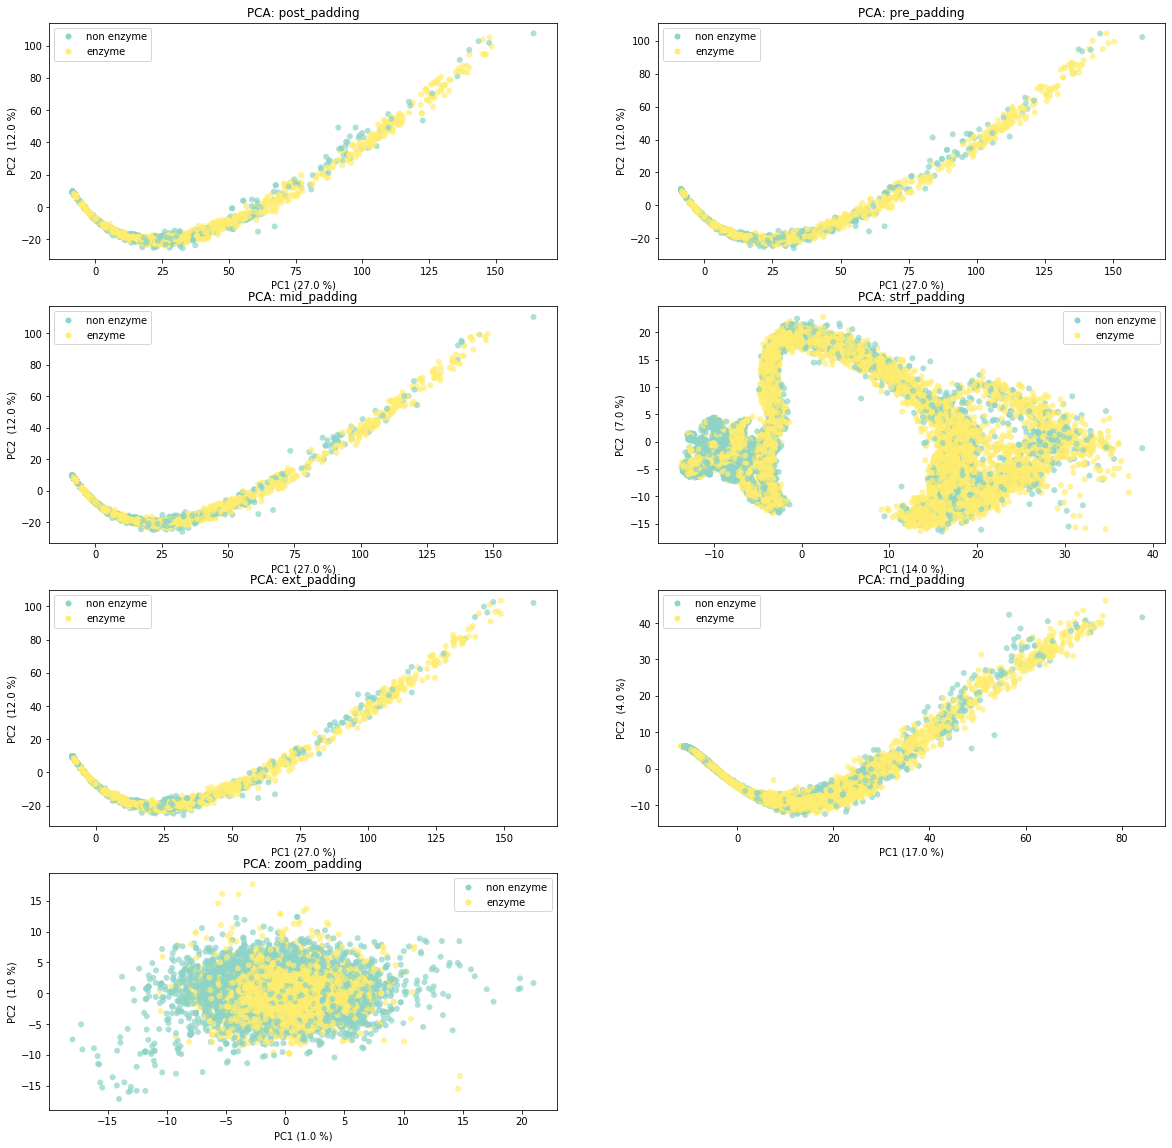

In [33]:
#fig, axs = plt.subplots(3,2, figsize=(15,15))
#coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1]]
fig, axs = plt.subplots(4,2, figsize=(20,20))
coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]
for idx, type_padding in enumerate(list_paddings):
    pc_tr = trained_pcas[idx]
    plotting_pca(pc_tr, binEnzyme_list, ["non enzyme", "enzyme"], type_padding, 
                 axs[coord_axs[idx][0], coord_axs[idx][1]], 
                 explained_variances[idx], type_plot="qualitative")
fig.delaxes(axs[3,1])
file_pcas = os.path.join(absPath, 'data/', folder, 'pca_enzyme.pdf')
fig.savefig(file_pcas, bbox_inches='tight')

### type of enzyme

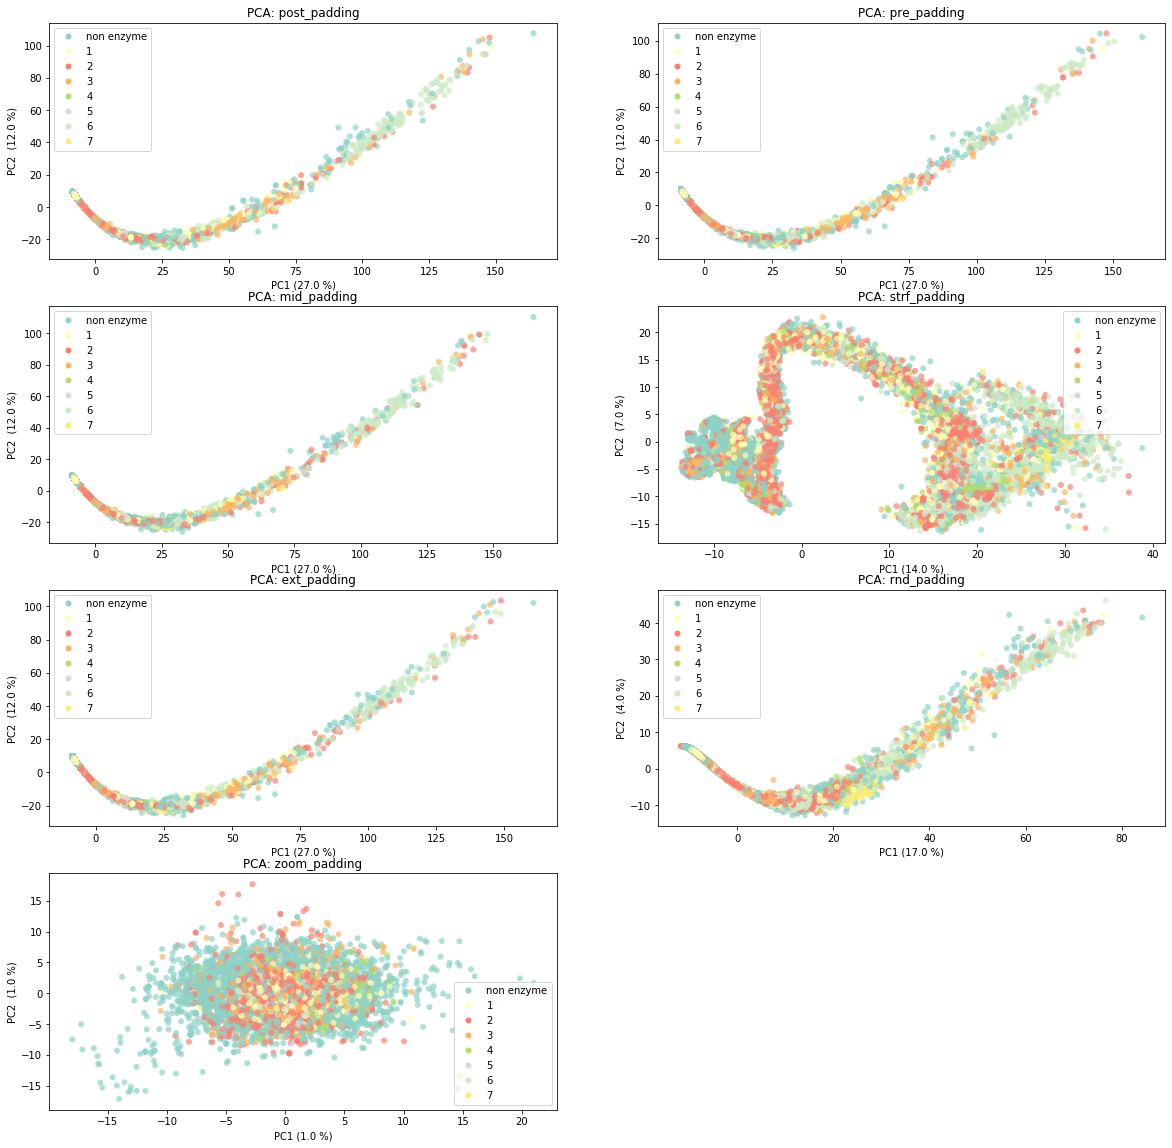

In [34]:
#fig, axs = plt.subplots(3,2, figsize=(15,15))
#coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1]]
fig, axs = plt.subplots(4,2, figsize=(20,20))
coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]
for idx, type_padding in enumerate(list_paddings):
    pc_tr = trained_pcas[idx]
    plotting_pca(pc_tr, typeEnzyme_list, ["non enzyme","1", "2", "3", "4", "5", "6", "7"], type_padding, 
                 axs[coord_axs[idx][0], coord_axs[idx][1]], 
                 explained_variances[idx], type_plot="qualitative")
fig.delaxes(axs[3,1])
file_pcas = os.path.join(absPath, 'data/', folder, 'pca_typeEnzyme.pdf')
fig.savefig(file_pcas, bbox_inches='tight')

### sequence length 

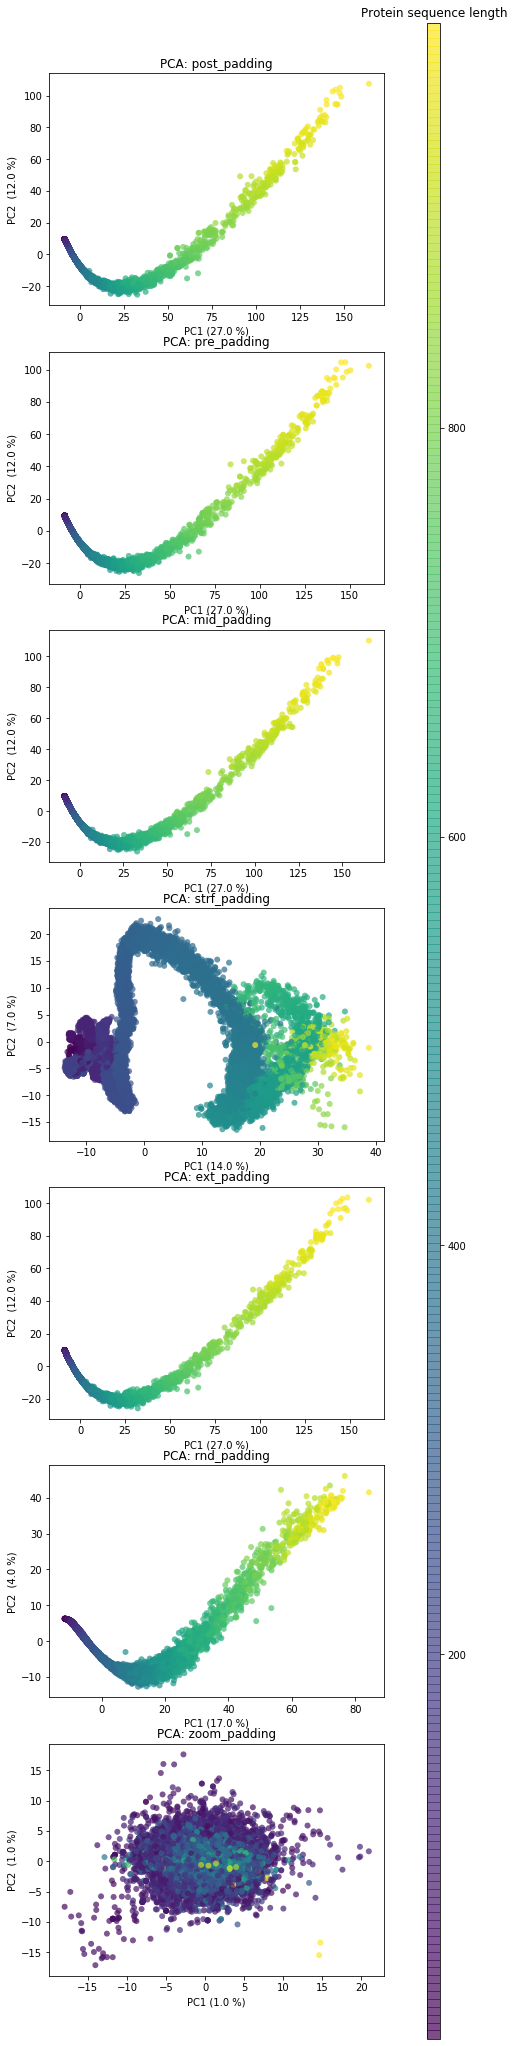

In [48]:
#fig, axs = plt.subplots(3,2, figsize=(15,15))
#coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1]]
fig, axs = plt.subplots(7,1, figsize=(6,35))
coord_axs = [[0,0], [1,0], [2,0], [3,0], [4,0], [5,0], [6,0]]
for idx, type_padding in enumerate(list_paddings):
    pc_tr = trained_pcas[idx]
    plotting_pca(pc_tr, seq_len, None, type_padding, 
                 axs[coord_axs[idx][0]
#                     , 
#                     coord_axs[idx][1]
                    ], 
                 explained_variances[idx], type_plot="Protein sequence")
#fig.delaxes(axs[3,1])
im = plt.gca().get_children()[0]
cax = fig.add_axes([1,0.1,0.03,0.8]) 
clb=fig.colorbar(im, cax=cax)  
clb.ax.set_title("Protein sequence length")

file_pcas = os.path.join(absPath, 'data/', folder, 'pca_seqlen.pdf')
fig.savefig(file_pcas, bbox_inches='tight')


### OJO si el numero de subplots es impar va a dar un problema al representar (Concretamente al representar 
###la colorbar)

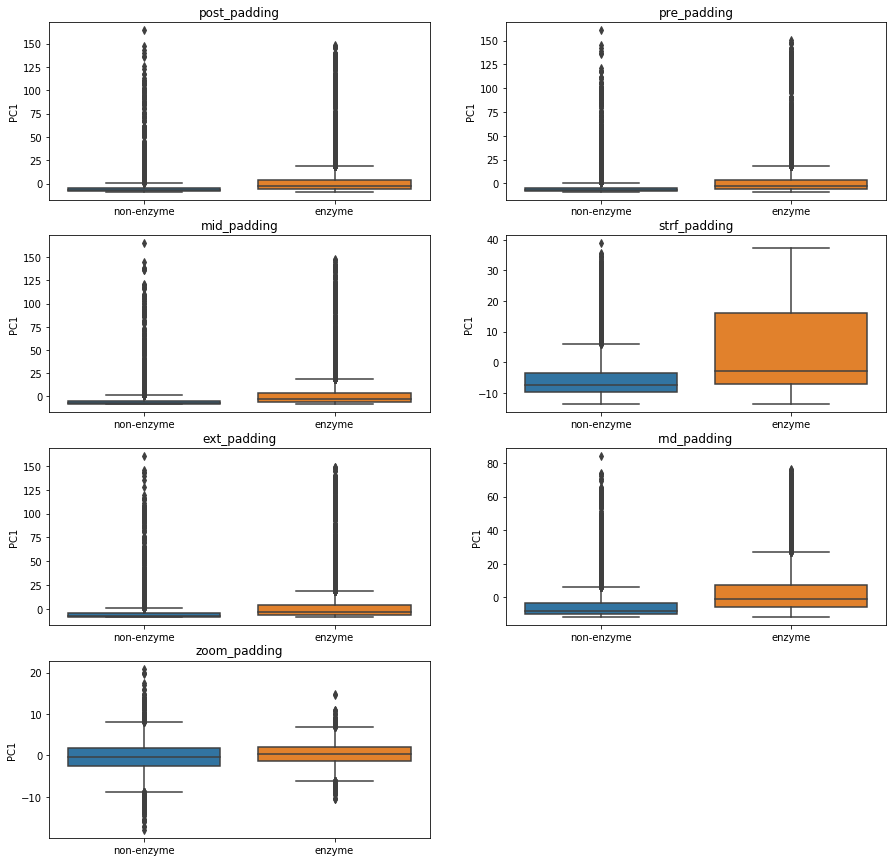

In [47]:
# Alex suggestion: plot PC1 scores vs enzyme/non-enzyme
#fig, axs = plt.subplots(3,2, figsize=(15,15))
fig, axs = plt.subplots(4,2, figsize=(15,15))
coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]
for idx, type_padding in enumerate(list_paddings):
    pc_tr = trained_pcas[idx]
    pc1 = pc_tr[:,0]
    df = pd.DataFrame([pc1, binEnzyme_list]).T
    df.columns = ["PC1", "type"]
    ey = sns.boxplot(x="type", y="PC1", data=df, ax=axs[coord_axs[idx][0], coord_axs[idx][1]])
    ey.set_title('%s' % type_padding)
    ey.set_ylabel('PC1')
    ey.set_xlabel('')
    ey.set_xticklabels(["non-enzyme", "enzyme"])
fig.delaxes(axs[3,1])

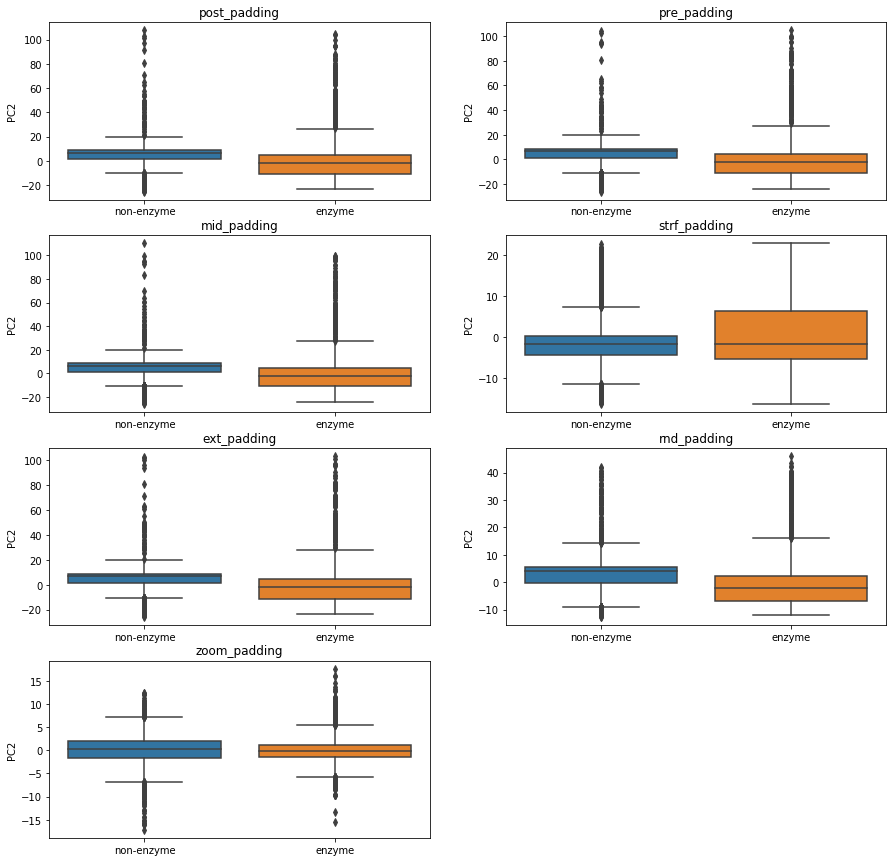

In [38]:
# Sergi suggestion: plot PC2 scores vs enzyme/non-enzyme (to see if there are differences beyond PC1)
#fig, axs = plt.subplots(3,2, figsize=(15,15))
fig, axs = plt.subplots(4,2, figsize=(15,15))
#coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]
for idx, type_padding in enumerate(list_paddings):
    pc_tr = trained_pcas[idx]
    pc2 = pc_tr[:,1]
    df = pd.DataFrame([pc2, binEnzyme_list]).T
    df.columns = ["PC2", "type"]
    ey = sns.boxplot(x="type", y="PC2", data=df, ax=axs[coord_axs[idx][0], coord_axs[idx][1]])
    ey.set_title('%s' % type_padding)
    ey.set_ylabel('PC2')
    ey.set_xlabel('')
    ey.set_xticklabels(["non-enzyme", "enzyme"])
fig.delaxes(axs[3,1])

In [39]:
binenzyme = np.asarray(["enzyme" if i==1.0 else "non enzyme" for i in list(binEnzyme_list)])
binenzyme

array(['enzyme', 'enzyme', 'enzyme', ..., 'enzyme', 'non enzyme',
       'non enzyme'],
      dtype='<U10')

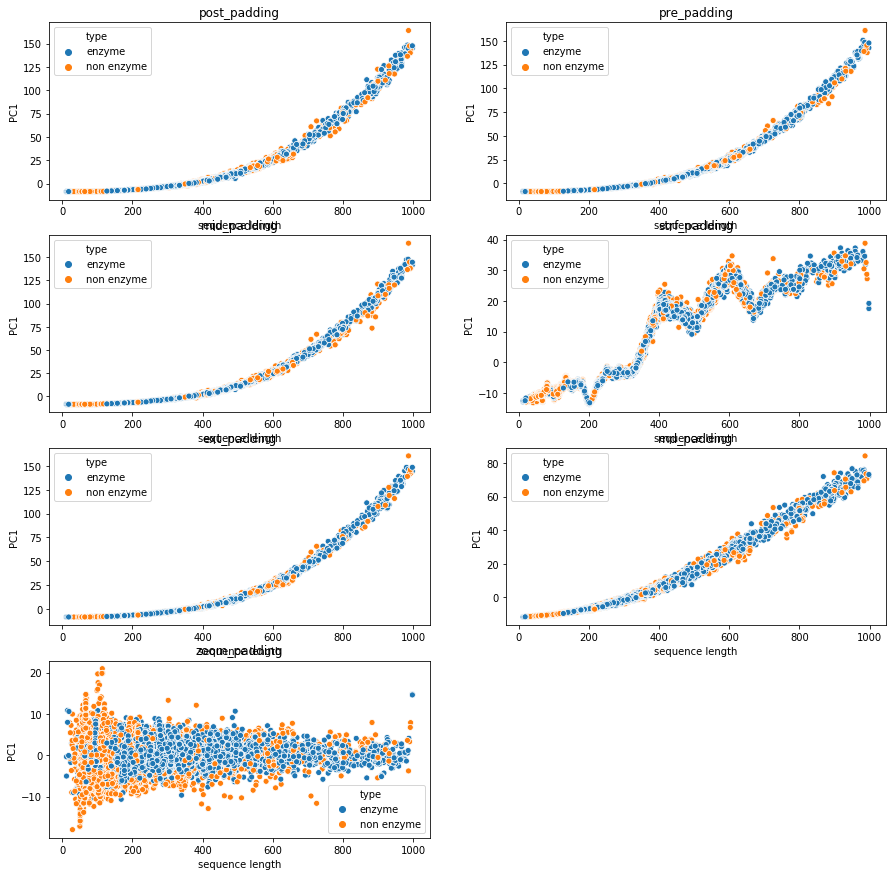

In [40]:
# Alex suggestion: plot PC1 scores vs seq_len
#fig, axs = plt.subplots(3,2, figsize=(15,15))
fig, axs = plt.subplots(4,2, figsize=(15,15))
coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]
for idx, type_padding in enumerate(list_paddings):
    pc_tr = trained_pcas[idx]
    pc1 = pc_tr[:,0]
    df = pd.DataFrame([pc1, seq_len, binenzyme]).T
    df.columns = ["PC1", "sequence_length", "type"]
    ey = sns.scatterplot(x="sequence_length", y="PC1", hue="type", data=df, 
                         ax=axs[coord_axs[idx][0], coord_axs[idx][1]])
    ey.set_title('%s' % type_padding)
    ey.set_ylabel('PC1')
    ey.set_xlabel('sequence length')
fig.delaxes(axs[3,1])

# tSNE

In [50]:
##proteins_df["seq_len"] = seq_len

In [ ]:
trained_tsnes = []
for type_padding in list_paddings:
    res_tsne = training_tsnes(folder, type_padding, 'data.h5')
    trained_tsnes.append(res_tsne)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19385 samples in 2.001s...
[t-SNE] Computed neighbors for 19385 samples in 489.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19385
[t-SNE] Computed conditional probabilities for sample 2000 / 19385
[t-SNE] Computed conditional probabilities for sample 3000 / 19385
[t-SNE] Computed conditional probabilities for sample 4000 / 19385
[t-SNE] Computed conditional probabilities for sample 5000 / 19385
[t-SNE] Computed conditional probabilities for sample 6000 / 19385
[t-SNE] Computed conditional probabilities for sample 7000 / 19385
[t-SNE] Computed conditional probabilities for sample 8000 / 19385
[t-SNE] Computed conditional probabilities for sample 9000 / 19385
[t-SNE] Computed conditional probabilities for sample 10000 / 19385
[t-SNE] Computed conditional probabilities for sample 11000 / 19385
[t-SNE] Computed conditional probabilities for sample 12000 / 19385
[t-SNE] Computed conditional probabilities for 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19385 samples in 1.981s...
[t-SNE] Computed neighbors for 19385 samples in 489.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19385
[t-SNE] Computed conditional probabilities for sample 2000 / 19385
[t-SNE] Computed conditional probabilities for sample 3000 / 19385
[t-SNE] Computed conditional probabilities for sample 4000 / 19385
[t-SNE] Computed conditional probabilities for sample 5000 / 19385
[t-SNE] Computed conditional probabilities for sample 6000 / 19385
[t-SNE] Computed conditional probabilities for sample 7000 / 19385
[t-SNE] Computed conditional probabilities for sample 8000 / 19385
[t-SNE] Computed conditional probabilities for sample 9000 / 19385
[t-SNE] Computed conditional probabilities for sample 10000 / 19385
[t-SNE] Computed conditional probabilities for sample 11000 / 19385
[t-SNE] Computed conditional probabilities for sample 12000 / 19385
[t-SNE] Computed conditional probabilities for 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19385 samples in 1.697s...


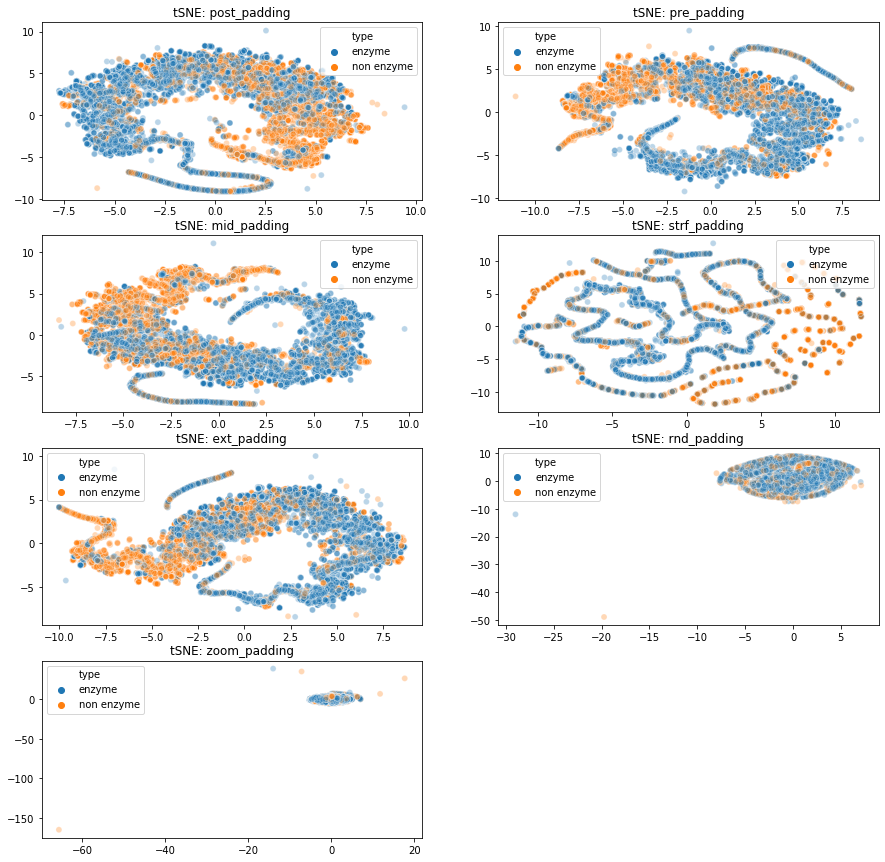

In [55]:
# tSNEs enzyme vs non enzyme
#fig, axs = plt.subplots(3,2, figsize=(15,15))
fig, axs = plt.subplots(4,2, figsize=(15,15))
coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]
for idx, type_padding in enumerate(list_paddings):
    res_tsne = trained_tsnes[idx]
    df = pd.DataFrame([res_tsne[:,0], res_tsne[:,1], binenzyme]).T
    df.columns = ["tSNE_2d_one", "tSNE_2d_two", "type"]
    ey = sns.scatterplot(x="tSNE_2d_one", y="tSNE_2d_two",hue='type',data=df, 
                         legend="full",alpha=0.3,                          
                         ax=axs[coord_axs[idx][0], coord_axs[idx][1]])
    ey.set_title('tSNE: %s' % type_padding)
    ey.set_ylabel('')
    ey.set_xlabel('')
fig.delaxes(axs[3,1])

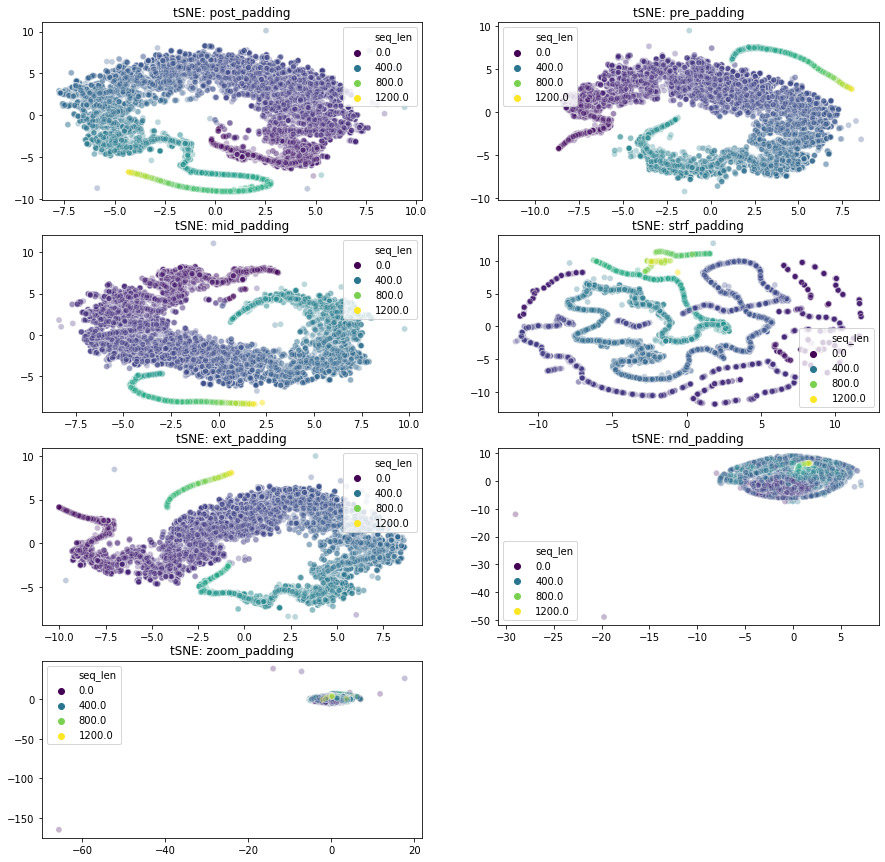

In [56]:
# tSNEs enzyme vs non enzyme
#fig, axs = plt.subplots(3,2, figsize=(15,15))
fig, axs = plt.subplots(4,2, figsize=(15,15))
#coord_axs = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0]]

for idx, type_padding in enumerate(list_paddings):
    res_tsne = trained_tsnes[idx]
    df = pd.DataFrame([res_tsne[:,0], res_tsne[:,1], seq_len]).T
    df.columns = ["tSNE_2d_one", "tSNE_2d_two", "seq_len"]
    norm = plt.Normalize(seq_len.min(), seq_len.max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    ey = sns.scatterplot(x="tSNE_2d_one", y="tSNE_2d_two",hue='seq_len',data=df, 
                         palette="viridis",alpha=0.3,                          
                         ax=axs[coord_axs[idx][0], coord_axs[idx][1]])
    ey.set_title('tSNE: %s' % type_padding)
    ey.set_ylabel('')
    ey.set_xlabel('')
    
fig.delaxes(axs[3,1])